Análisis de la Inclusión Financiera
======================================

**Autora**: Helen C. Peñate Rodríguez

Datos del INEGI: https://www.inegi.org.mx/programas/enif/2021/

# Importación de Datos

In [1]:
# Import the necesary library
import pandas as pd # For all DataFrames functions
import os # To read the files in a folder
from unidecode import unidecode # Remove the accents 

In [2]:
# Reading the data
df_modulo = pd.read_csv("conjunto_de_datos_tmodulo_enif_2021.csv",
                        delimiter=',')
df_sdem = pd.read_csv("conjunto_de_datos_tsdem_enif_2021.csv",
                      delimiter=',')

In [3]:
df_modulo.head()

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
0,1,1,1,1,0,0,4,2,1,8,...,NaN,NaN,2,1,3,2,83,3,1,3807
1,2,2,1,1,3,3,6,2,1,1,...,NaN,NaN,2,1,3,2,33,3,1,1903
2,3,3,1,4,3,2,1,2,2,1,...,NaN,NaN,2,1,3,1,30,3,1,8897
3,4,4,1,1,2,6,3,2,2,5,...,NaN,NaN,2,1,3,2,64,3,1,5710
4,5,5,1,1,2,5,5,2,1,8,...,NaN,NaN,2,1,3,1,70,3,1,14236


In [4]:
df_modulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13554 entries, 0 to 13553
Columns: 382 entries, FOLIO to FAC_ELE
dtypes: float64(261), int64(121)
memory usage: 39.5 MB


In [5]:
df_sdem.head()

,FOLIO,VIV_SEL,HOGAR,N_REN,P2_3,SEXO,EDAD,NIV,GRA,TLOC,REGION,EST_DIS,UPM_DIS,FAC_HOG
0,1,1,1,2,3,2,60,NaN,NaN,1,3,3,1,1841
1,1,1,1,1,1,2,83,2.0,2.0,1,3,3,1,1841
2,2,2,1,1,1,2,33,3.0,3.0,1,3,3,1,1841
3,2,2,1,2,3,1,15,NaN,NaN,1,3,3,1,1841
4,2,2,1,3,3,2,13,NaN,NaN,1,3,3,1,1841


In [6]:
df_sdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47045 entries, 0 to 47044
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FOLIO    47045 non-null  int64  
 1   VIV_SEL  47045 non-null  int64  
 2   HOGAR    47045 non-null  int64  
 3   N_REN    47045 non-null  int64  
 4   P2_3     47045 non-null  int64  
 5   SEXO     47045 non-null  int64  
 6   EDAD     47045 non-null  int64  
 7   NIV      13561 non-null  float64
 8   GRA      13561 non-null  float64
 9   TLOC     47045 non-null  int64  
 10  REGION   47045 non-null  int64  
 11  EST_DIS  47045 non-null  int64  
 12  UPM_DIS  47045 non-null  int64  
 13  FAC_HOG  47045 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 5.0 MB


# Limpieza de Datos

## Creando las funciones necesarias

In [7]:
def modify(lista,name):
    # This function remove selected columns from selected catalogos
    if name == 'edad': 
        label = 'Anos cumplidos'
    elif name == 'p12_4':
        label = 'Meses'
    elif name == 'p3_8a':
        label = 'Ingresos'
    elif name == 'p10_9_2' or name == 'p10_6_2' or name == 'p10_3_2':
        label = 'Minutos'
    elif name == 'p5_12' or name == 'p6_9':
        label = 'Numero de veces'
    elif name == 'p10_6_1' or name == 'p10_9_1' or name == 'p10_3_1':
        label = 'Horas'
    selection = lista[lista['descrip']==label].index
    lista.drop(selection,inplace=True)
    lista.cve = lista.cve.astype('int')  

In [8]:
def reemplazo(label,df):
    # Read de file
    lista = pd.read_csv(label,delimiter=',',encoding='latin1')
    # Get the name of the file (without extension)
    label_name = label[label.rfind('/')+1:label.rfind('.')]  
    # Removing accents (OMG!! So enoying!!)
    for index, row in lista.iterrows(): lista.at[index,'descrip'] = unidecode(row['descrip'])#row['descrip'] = unidecode(row['descrip'])#
    # Check for specific files to be modified
    if label_name in ['edad', 'p12_4', 'p3_8a','p10_9_2','p10_6_2',
                      'p10_3_2','p5_12','p6_9','p10_6_1','p10_9,1','p10_3_1']:
            modify(lista,label_name)
    # Change the index column to cve
    lista.set_index('cve',inplace=True)
    # Convert the dataframe into a dictionary
    dicc = lista.to_dict()['descrip']
    # Replace the values
    df.replace({label_name.upper():dicc},inplace=True)

In [9]:
def rango_edad(df):
    # Function for creating ranges of ages and incomes
    age_range = []
    for index, row in df.iterrows(): 
        age_item = row['EDAD']
        if type(age_item)== int:
            if age_item<=18: age_range.append('Menores de 18')
            elif age_item<65: age_range.append('Edad laboral')
            else: age_range.append('Tercera edad')
        else: age_range.append(age_item)
    df['RANGO_EDAD'] = age_range

In [10]:
def rango_ingresos(df):
#    import time
    # Function for creating ranges of ages and incomes
    income_range =[]
    for index, row in df.iterrows(): 
        income_item = row['INGRESOS']
        if type(income_item)== int:
            if income_item<=6400: income_range.append('Menos del salario minimo')
            elif income_item<20000: income_range.append('Menos de 20000')
            else: income_range.append('Menos de 98000')
        else: income_range.append(income_item)
 #       print(age_range)
 #       time.sleep(2)
    df['RANGO_ING'] = income_range

## Reemplazando valores numéricos por valores categóricos

### Reemplazando Datos en tsdem

In [11]:
# Creating a list with all files in the folder
directory = './data/datos_inclusion_financiera_2021/conjunto_de_datos_tsdem_enif_2021/catalogos/'
catalogos_sdem = [f for f in os.listdir(directory)]

In [12]:
# Replacing empty cells with values
df_sdem['NIV'] = df_sdem['NIV'].fillna(99) # to be consistent with what niv.csv says
df_sdem.NIV = df_sdem.NIV.astype('int')


In [13]:
sdem_cp = df_sdem.copy() #It is not that big, I can create a copy ;-)
for name in catalogos_sdem: reemplazo(directory+name,sdem_cp)

In [14]:
sdem_cp.iloc[245:255]

,FOLIO,VIV_SEL,HOGAR,N_REN,P2_3,SEXO,EDAD,NIV,GRA,TLOC,REGION,EST_DIS,UPM_DIS,FAC_HOG
245,75,2,1,3,Otro parentesco,Hombre,29,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
246,75,2,1,7,Otro parentesco,Mujer,Menos de un ano,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
247,75,2,1,6,Hija(o),Mujer,1,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
248,76,3,1,5,Hija(o),Mujer,Menos de un ano,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
249,76,3,1,4,Hija(o),Hombre,6,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
250,76,3,1,3,Hija(o),Mujer,9,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
251,76,3,1,2,Esposa(o) o companera(o),Mujer,30,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
252,76,3,1,1,Jefa(e),Hombre,39,Secundaria,3.0,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
253,77,4,1,1,Jefa(e),Hombre,29,Preparatoria o bachillerato,3.0,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240
254,77,4,1,5,Hija(o),Mujer,1,No sabe,NaN,100 000 y mas habitantes,"Occidente y Bajio (Aguascalientes, Guanajuato...",4,18,1240


In [15]:
rango_edad(sdem_cp)
sdem_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47045 entries, 0 to 47044
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FOLIO       47045 non-null  int64  
 1   VIV_SEL     47045 non-null  int64  
 2   HOGAR       47045 non-null  int64  
 3   N_REN       47045 non-null  int64  
 4   P2_3        47045 non-null  object 
 5   SEXO        47045 non-null  object 
 6   EDAD        47045 non-null  object 
 7   NIV         47045 non-null  object 
 8   GRA         13561 non-null  float64
 9   TLOC        47045 non-null  object 
 10  REGION      47045 non-null  object 
 11  EST_DIS     47045 non-null  int64  
 12  UPM_DIS     47045 non-null  int64  
 13  FAC_HOG     47045 non-null  int64  
 14  RANGO_EDAD  47045 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 5.4+ MB


### Reemplazando Datos en tmodulo

In [16]:
# Creating a list with all files in the folder
directory = './data/datos_inclusion_financiera_2021/conjunto_de_datos_tmodulo_enif_2021/catalogos/'
catalogos_modulo = [f for f in os.listdir(directory)]

In [17]:
# Replacing NAN entries in this column with the value 0
df_modulo['P3_8A'] = df_modulo['P3_8A'].fillna(0)
df_modulo.P3_8A = df_modulo.P3_8A.astype('int')

In [18]:
# Replacing numbers by categorical values
for name in catalogos_modulo: reemplazo(directory+name,df_modulo)

In [19]:
df_modulo.iloc[3961:3970]

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
3961,3901,1,1,2,Preparatoria o bachillerato,3,Vive con su pareja en union libre,No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Mujer,42,54,664,7707
3962,3902,2,1,1,Licenciatura o ingenieria (profesional),4,Vive con su pareja en union libre,No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Hombre,35,54,664,5254
3963,3903,3,1,1,Secundaria,3,Vive con su pareja en union libre,No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Hombre,58,54,664,5254
3964,3904,4,1,4,Licenciatura o ingenieria (profesional),4,Es soltera(o),No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Hombre,30,54,664,15763
3965,3905,5,1,1,Secundaria,3,Esta separada(o),No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Mujer,45,54,664,7707
3966,3906,1,1,4,Licenciatura o ingenieria (profesional),4,Es soltera(o),No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Hombre,32,54,665,8089
3967,3907,2,1,1,Preparatoria o bachillerato,3,Esta separada(o),No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Mujer,55,54,665,1978
3968,3908,3,1,1,Licenciatura o ingenieria (profesional),4,Esta separada(o),No,No,Trabajo por lo menos una hora,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Mujer,42,54,665,1978
3969,3909,4,1,2,Primaria,6,Esta casada(o),No,Si,Se dedica a los quehaceres del hogar o a cuida...,...,NaN,NaN,No,100 000 y mas habitantes,Ciudad de Mexico (Ciudad de Mexico),Mujer,74,54,665,3955


In [20]:
# Making names some field names readable!!!
df_modulo.rename(columns={'P3_8A':'INGRESOS','P3_1_1':'NIVEL','P3_1_2':'NIVEL_ANO',
                          'P3_7':'ACT_LAB','P5_4_4':'C_AHORRO'},
                 inplace=True)


In [21]:
# Creating a range field for age and incomes
rango_edad(df_modulo)
rango_ingresos(df_modulo)

In [22]:
df_modulo['RANGO_EDAD']#[3961:3970]

0        Tercera edad
1        Edad laboral
2        Edad laboral
3        Edad laboral
4        Tercera edad
             ...     
13549    Tercera edad
13550    Edad laboral
13551    Edad laboral
13552    Edad laboral
13553    Edad laboral
Name: RANGO_EDAD, Length: 13554, dtype: object

In [23]:
df_modulo['RANGO_ING'][3961:3970]

3961           No responde
3962        Menos de 20000
3963           No responde
3964        Menos de 20000
3965           No responde
3966        Menos de 20000
3967           No responde
3968           No responde
3969    No recibe ingresos
Name: RANGO_ING, dtype: object

### Analizando los ingresos

In [24]:
# Changing the name of the incomes column

# Ingreso máximo
#display(df_modulo.nlargest(1,'INGRESOS'))
df_modulo.INGRESOS

0        No recibe ingresos
1                      1250
2                      1000
3        No recibe ingresos
4        No recibe ingresos
                ...        
13549    No recibe ingresos
13550                  1800
13551    No recibe ingresos
13552                  2100
13553    No recibe ingresos
Name: INGRESOS, Length: 13554, dtype: object

In [25]:
# Who don't get incomes?
df_modulo.loc[df_modulo['INGRESOS']=='No recibe ingresos',['NIVEL','ACT_LAB','C_AHORRO']]

,NIVEL,ACT_LAB,C_AHORRO
0,Ninguno,NaN,No
3,Primaria,NaN,No
4,Primaria,NaN,No
6,Primaria,NaN,No
10,Licenciatura o ingenieria (profesional),NaN,No
...,...,...,...
13547,Primaria,NaN,No
13548,Preparatoria o bachillerato,NaN,No
13549,Primaria,NaN,No
13551,Secundaria,NaN,No


### Eliminando paréntesis en la columna REGION

In [26]:
sdem_cp['REGION']

0        Occidente y Bajio  (Aguascalientes, Guanajuato...
1        Occidente y Bajio  (Aguascalientes, Guanajuato...
2        Occidente y Bajio  (Aguascalientes, Guanajuato...
3        Occidente y Bajio  (Aguascalientes, Guanajuato...
4        Occidente y Bajio  (Aguascalientes, Guanajuato...
                               ...                        
47040    Occidente y Bajio  (Aguascalientes, Guanajuato...
47041    Occidente y Bajio  (Aguascalientes, Guanajuato...
47042    Occidente y Bajio  (Aguascalientes, Guanajuato...
47043    Occidente y Bajio  (Aguascalientes, Guanajuato...
47044    Occidente y Bajio  (Aguascalientes, Guanajuato...
Name: REGION, Length: 47045, dtype: object

In [27]:
for index, row in sdem_cp.iterrows():
    text = row['REGION']
    if text.count('(') != 0: 
        sdem_cp.at[index,'REGION'] = text[0:text.find('(')]

sdem_cp['REGION']

0        Occidente y Bajio  
1        Occidente y Bajio  
2        Occidente y Bajio  
3        Occidente y Bajio  
4        Occidente y Bajio  
                ...         
47040    Occidente y Bajio  
47041    Occidente y Bajio  
47042    Occidente y Bajio  
47043    Occidente y Bajio  
47044    Occidente y Bajio  
Name: REGION, Length: 47045, dtype: object

# Visualización

In [28]:
# Import more libraries for graphs
import matplotlib.pyplot as plot # For graphics
import numpy as np

In [29]:
def barplot(xvalues,yvalues_sdem,yvalues_modulo,legend,title_text):
    # Function for bar plot of both Dataframes
    fig = plot.gca()
    barwidth = .25
    br1 = np.arange(len(xvalues))
    br2 = [x + barwidth for x in br1]
    p1 = fig.barh(br1,yvalues_sdem,height=barwidth,label=legend[0])
    p2 = fig.barh(br2,yvalues_modulo,height=barwidth,label=legend[1])
    fig.set_yticks(range(len(xvalues)), xvalues)
   # plot.yscale('log')
    fig.set_title(title_text)
    fig.legend()
    return fig

### Distribucion de Mujeres y Hombres

def muj_hom(df):
    # Function for ploting the number of women and men
    counting = df['SEXO'].value_counts()
    xvalues = counting.keys()
    yvalues = counting.values()
    fig = plot.figure()
    plot.bar(xvalues,yvalues)
    plot.xticks(range(len(xvalues)), xvalues,rotation=90)
    #plot.ylabel('')
    plot.yscale('log')
    #plot.title('')
    plot.show()

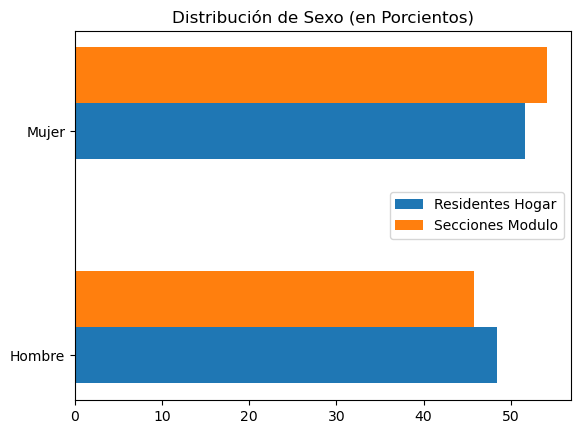

In [30]:
counting_sdem = sdem_cp['SEXO'].value_counts()
counting_modulo = df_modulo['SEXO'].value_counts()
sdem_total = counting_sdem['Hombre'] + counting_sdem['Mujer']
modulo_total = counting_modulo['Hombre']+counting_modulo['Mujer']
yvalues_sdem = [counting_sdem['Hombre']/sdem_total*100,
                counting_sdem['Mujer']/sdem_total*100]
yvalues_modulo = [counting_modulo['Hombre']/modulo_total*100,
                  counting_modulo['Mujer']/modulo_total*100]
xvalues = ['Hombre','Mujer']
legend = ['Residentes Hogar','Secciones Modulo']
title = 'Distribución de Sexo (en Porcientos)'
fig = barplot(xvalues,yvalues_sdem,yvalues_modulo,legend,title)

### Rangos de edades

In [31]:
def rango_edad_plot(df):
# Function for getting the number of entries per range
    counting = df['RANGO_EDAD'].value_counts()
    lista = counting.keys()
    yvalues = []
    legend = ['Menos de un ano','Menores de 18',
            'Edad laboral','Tercera edad',
            'Edad no especificada en personas de 18 anos y mas',
            'Otra edad no especificada',
            '97 anos y mas']
    for k in range(7):
        if legend[k] in lista: yvalues.append(counting[legend[k]]/len(df)*100)
        else: yvalues.append(0)
    return yvalues

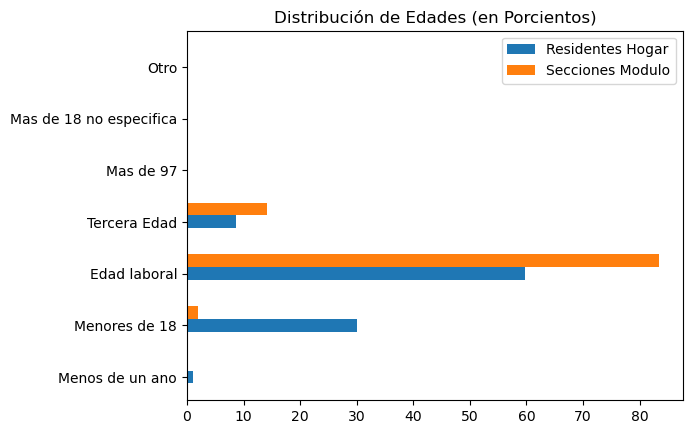

In [32]:
# Plotting both results
xvalues = ['Menos de un ano','Menores de 18','Edad laboral','Tercera Edad',
            'Mas de 97','Mas de 18 no especifica','Otro']
yvalues_sdem = rango_edad_plot(sdem_cp)
yvalues_modulo = rango_edad_plot(df_modulo)
legend = ['Residentes Hogar','Secciones Modulo']
title = 'Distribución de Edades (en Porcientos)'
fig = barplot(xvalues,yvalues_sdem,yvalues_modulo,legend,title)

#### Hombres y Mujeres en cada rango de Edad

In [33]:
def sex_edad(df):
    sex_edad_result= df.groupby(['RANGO_EDAD','SEXO']).size()
    lista = sex_edad_result.index.get_level_values('RANGO_EDAD')
    lista = list(set(lista))
    yvalues_h = []
    yvalues_m = []
    legend = ['Menos de un ano','Menores de 18',
            'Edad laboral','Tercera edad',
            'Edad no especificada en personas de 18 anos y mas',
            'Otra edad no especificada',
            '97 anos y mas']
    for k in range(7):
        if legend[k] in lista:
            lista_gen = sex_edad_result[legend[k]].index.get_level_values('SEXO')
            if 'Hombre' in lista_gen:
                hombre = sex_edad_result[legend[k],'Hombre']
            else: hombre =0
            if 'Mujer' in lista_gen:
                mujer = sex_edad_result[legend[k],'Mujer']
            else: mujer =0
            total =  hombre+mujer
            yvalues_h.append(hombre/total*100)
            yvalues_m.append(mujer/total*100)
        else: 
            yvalues_h.append(0)
            yvalues_m.append(0)
    return pd.DataFrame({'Hombre':yvalues_h,'Mujer':yvalues_m},index=legend)

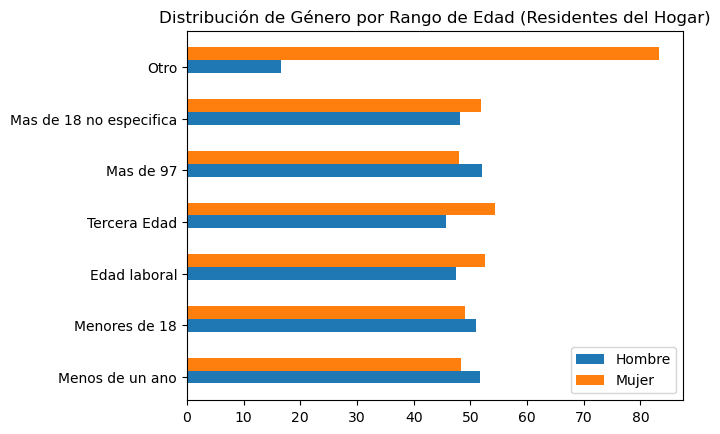

In [34]:
sex_edad_result = sex_edad(sdem_cp)
xvalues = ['Menos de un ano','Menores de 18','Edad laboral','Tercera Edad',
            'Mas de 97','Mas de 18 no especifica','Otro']
yvalues_h = sex_edad_result['Hombre']
yvalues_m = sex_edad_result['Mujer']
legend=['Hombre','Mujer']
title='Distribución de Género por Rango de Edad (Residentes del Hogar)'
fig = barplot(xvalues,yvalues_h,yvalues_m,legend,title)

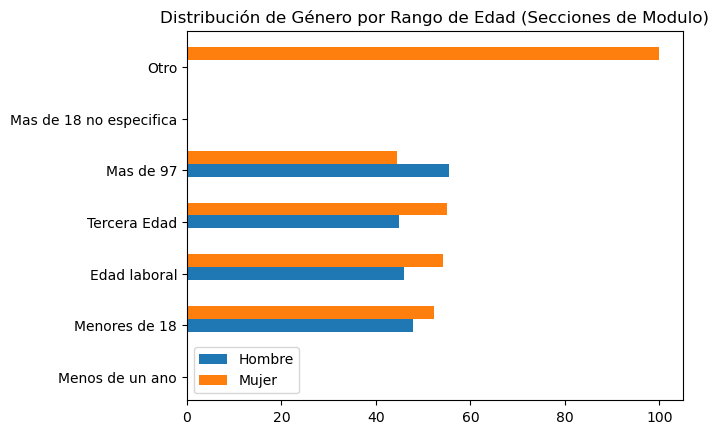

In [35]:
sex_edad_result = sex_edad(df_modulo)
xvalues = ['Menos de un ano','Menores de 18','Edad laboral','Tercera Edad',
            'Mas de 97','Mas de 18 no especifica','Otro']
yvalues_h = sex_edad_result['Hombre']
yvalues_m = sex_edad_result['Mujer']
legend=['Hombre','Mujer']
title='Distribución de Género por Rango de Edad (Secciones de Modulo)'
fig = barplot(xvalues,yvalues_h,yvalues_m,legend,title)

#### Nivel Educativo por Sexo

In [36]:
niveles = ['Ninguno','Preescolar o kinder','Primaria','Secundaria',
           'Estudios tecnicos con secundaria terminada',
           'Estudios tecnicos con preparatoria terminada',
           'Normal basica',
           'Preparatoria o bachillerato',
            'Estudios tecnicos con preparatoria terminada',
            'Licenciatura o ingenieria (profesional)',
            'Maestria o doctorado']
niv_sex = sdem_cp.groupby(['NIV','SEXO']).size()
display(niv_sex)

NIV                                           SEXO  
Estudios tecnicos con preparatoria terminada  Hombre      166
                                              Mujer       129
Estudios tecnicos con secundaria terminada    Hombre      112
                                              Mujer       135
Licenciatura o ingenieria (profesional)       Hombre     1641
                                              Mujer       631
Maestria o doctorado                          Hombre      215
                                              Mujer        99
Ninguno                                       Hombre      524
                                              Mujer       349
No sabe                                       Hombre    13579
                                              Mujer     20002
Normal basica                                 Hombre       31
                                              Mujer        15
Preescolar o kinder                           Hombre        9
                 

Text(0.5, 1.0, 'Distribución de Niveles Educativos')

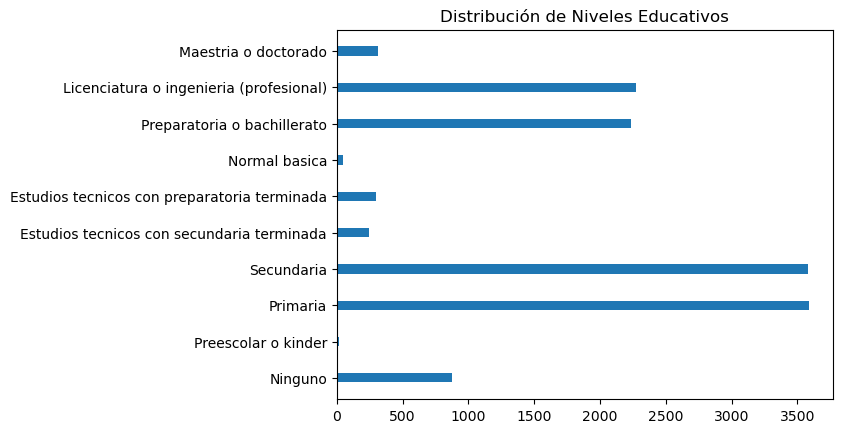

In [37]:
yvalues_h = []
yvalues_m = []
total_v = []
barwidth= .25
for k in range(11):
    hombre = niv_sex[niveles[k],'Hombre']
    mujer = niv_sex[niveles[k],'Mujer']
    total=hombre + mujer
    yvalues_h.append(hombre/total*100)
    yvalues_m.append(mujer/total*100)
    total_v.append(total)

plot.barh(niveles,total_v,height=barwidth)
plot.title('Distribución de Niveles Educativos')

<AxesSubplot:title={'center':'Porciento de Edades en Cada Nivel'}>

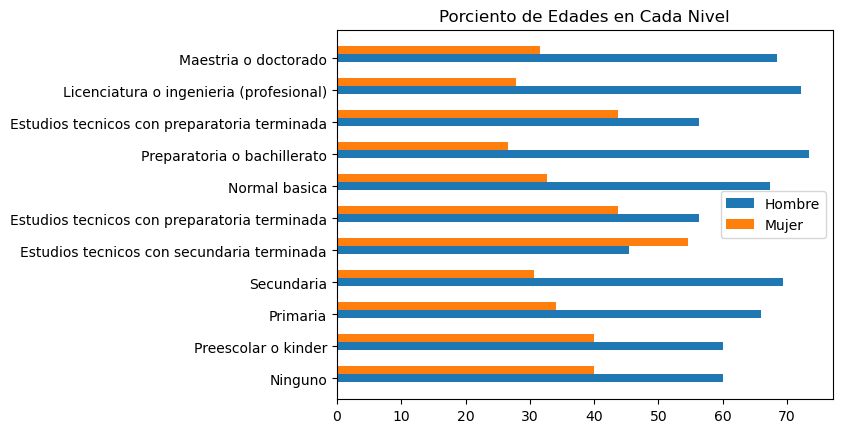

In [38]:
legend = ['Hombre','Mujer']
title = 'Porciento de Edades en Cada Nivel'
barplot(niveles,yvalues_h,yvalues_m,legend,title)

### Trabajando con opciones múltiples

In [39]:
def multichoice(df,rango,title):
    # Función para hacer los gráficos de opción múltiple
    options=df.loc[:,rango[0]:rango[1]].apply(pd.Series.value_counts)
    options.drop('No se declaro como opcion afirmativa',inplace=True)
    values = [row[:].sum() for index, row in options.iterrows()]
    options['sum']=values
    options.sort_values('sum',inplace=True)
    plot.barh(options.index,options['sum'])
    plot.title(title)

#### Razones para tener un cuenta

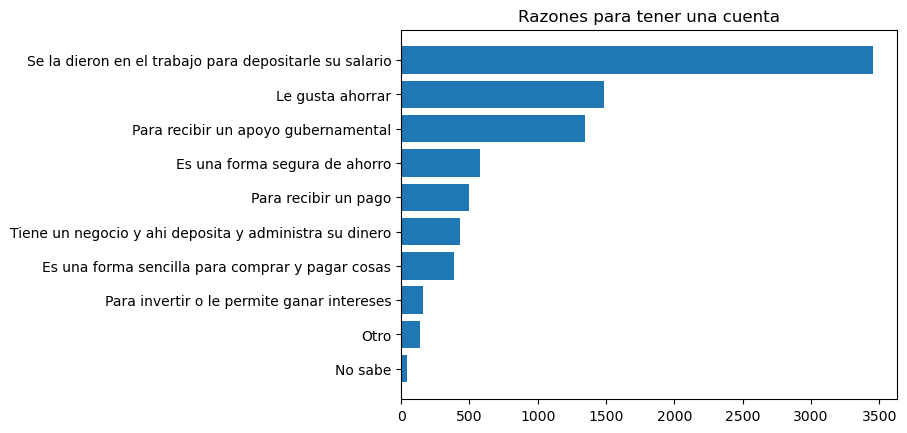

In [40]:
title = 'Razones para tener una cuenta'
rango = ['P5_8_01','P5_8_10']
multichoice(df_modulo,rango,title)

#### Instituciones o Bancos

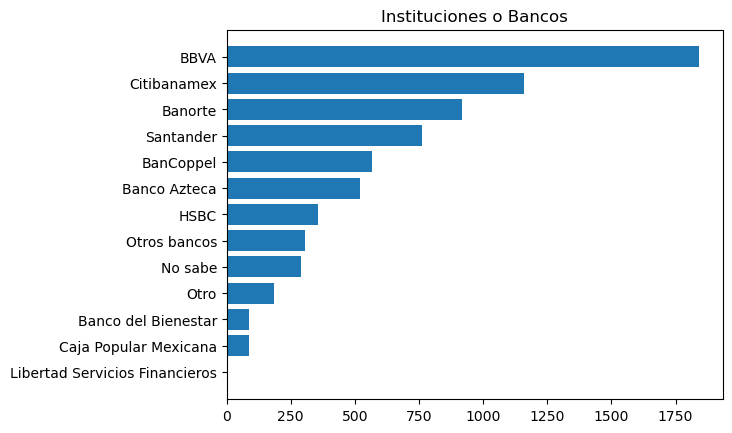

In [41]:
title='Instituciones o Bancos'
rango2 = ['P5_18_01','P5_18_99']
multichoice(df_modulo,rango2,title)

#### Medios para movimientos y consultas 

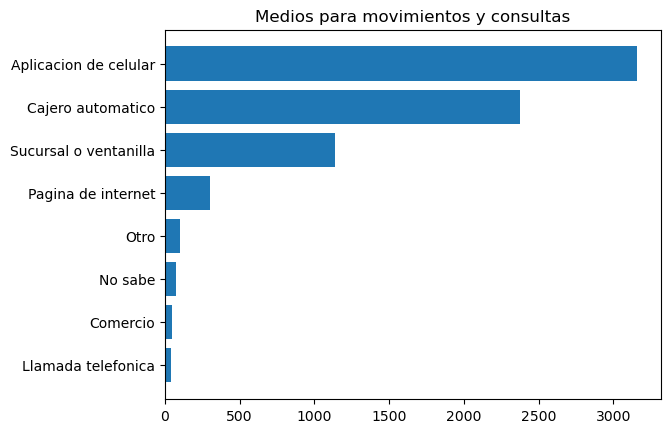

In [42]:
title='Medios para movimientos y consultas'
rango3 = ['P5_19_1','P5_19_9']
multichoice(df_modulo,rango3,title)

#### Bancos para Tarjetas de Crédito

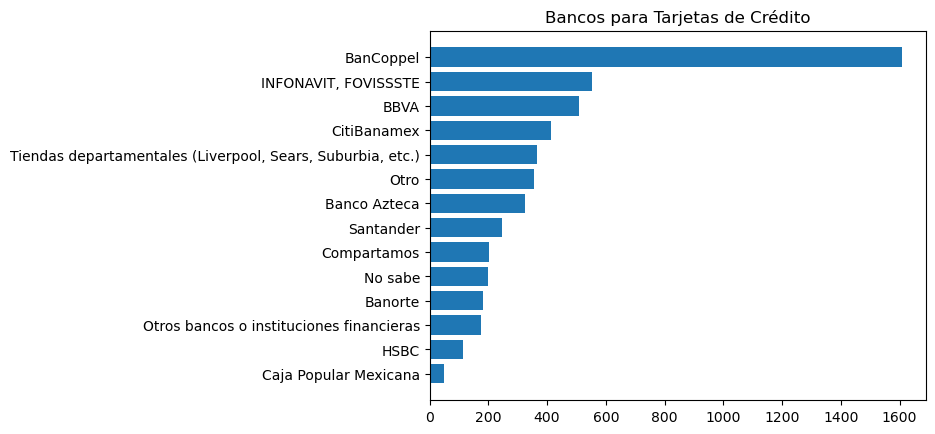

In [43]:
title= 'Bancos para Tarjetas de Crédito'
rango4 = ['P6_8_01','P6_8_99']
multichoice(df_modulo,rango4,title)

#### Razones para negar el crédito

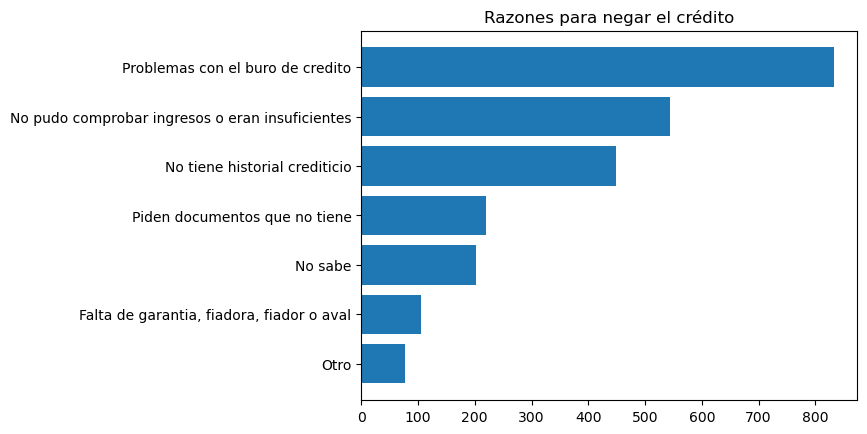

In [44]:
title='Razones para negar el crédito'
rango5 = ['P6_18_1','P6_18_9']
multichoice(df_modulo,rango5,title)

#### Forma de Pago

In [45]:
options=df_modulo.loc[:,'P7_1_1':'P7_1_2'].apply(pd.Series.value_counts)
display(options)

,P7_1_1,P7_1_2
Cargo automatico a una cuenta o tarjeta (pago domiciliado),15,22
Cheques,3,3
Efectivo,12045,10621
No realiza esos pagos,136,440
Otro,21,18
Tarjeta de credito,162,421
Tarjeta de debito,939,1648
Tarjeta prepagada,10,9
Transferencia electronica,223,372


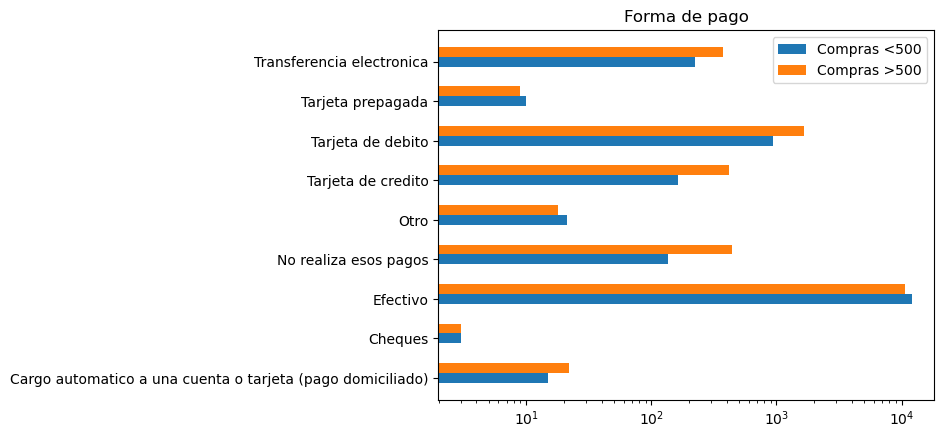

In [46]:
legend=['Compras <500','Compras >500']
title='Forma de pago'
fig= barplot(options.index,options['P7_1_1'],options['P7_1_2'],legend,title)
fig.set_xscale('log')